**라이브러리 import 하기**

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data(given)**

In [2]:
x_train = [2, 4, 6, 8, 10]
y_train = [5, 4, 3, 2, 1]
signal_length = len(x_train)
y_noise = np.random.normal(0,1,signal_length)

y_train = y_train + y_noise

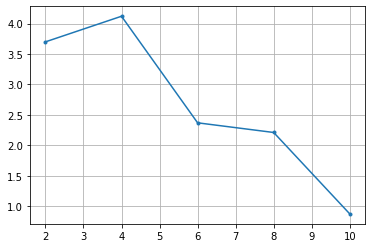

In [3]:
plt.plot(x_train, y_train, '.-')
plt.grid()

**initalization**

In [5]:
w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='wbias')

w0 = 9.0;
b0 = 4.0;

w = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='baias')

In [6]:
hyporthesis = x_train * w + b

In [7]:
loss = tf.reduce_mean(tf.square(hyporthesis - y_train))

**Optimizer**

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [9]:
sess = tf.Session()

**Initializes global variables in the graph.**

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
nb_epoch = 2001

for step in range(nb_epoch):
    sess.run(train)
    
    if step % 200 == 0: 
        w1 = sess.run(w)[0] 
        b1 = sess.run(b)[0]
        print(step, sess.run(loss), w1, b1)

0 41.432655 0.8582796 2.8931143
200 0.39634684 -0.23312217 3.8661864
400 0.24244113 -0.30690777 4.405086
600 0.20562634 -0.34299526 4.668654
800 0.19682005 -0.36064538 4.797563
1000 0.19471374 -0.36927742 4.8606076
1200 0.19420974 -0.37349918 4.8914423
1400 0.19408944 -0.3755638 4.906521
1600 0.19406047 -0.37657356 4.913896
1800 0.19405352 -0.37706748 4.9175034
2000 0.19405195 -0.37730896 4.919267


**학습완료**

In [12]:
w1 = sess.run(w)[0]
b1 = sess.run(b)[0]


**출력해보기**

In [13]:
print(w1, b1)

-0.37730896 4.919267


In [14]:
strl = 'y =' + str(w1) + 'x +' + str(b1)
print(strl)

y =-0.37730896x +4.919267


Text(0.5, 1.0, 'y =-0.37730896x +4.919267')

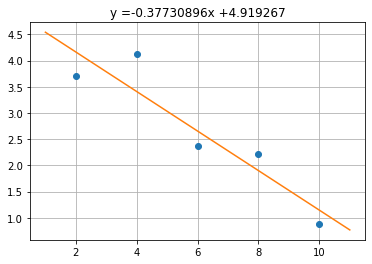

In [15]:
plt.figure(figsize=(6,4))
plt.plot(x_train, y_train, 'o')

x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid()
plt.title(strl)